# Data Analysis

This notebook is used to analyse the considered datasets and visualize the information they provide.

In [1]:
import pandas as pd
import numpy as np
import math
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")

## Methods

In [2]:
def discretizeTime(time):
    '''
    function to map 24-hours format time to one of the six 4 hours intervals.
    '''
    if time == 't1':
        return '0 - 3:59'
    elif time == 't2':
        return '4 - 7:59'
    elif time == 't3':
        return '8 - 11:59'
    elif time == 't4':
        return '12 - 15:59'
    elif time == 't5':
        return '16 - 19:59'
    elif time == 't6':
        return '20 - 23:59'

## Visualizations

Read the saved dataframe from store directory.

In [3]:
crime_data = pd.read_pickle('store/crime_data.pkl', compression='gzip')

In [4]:
crime_data.head() 

,category,day,district,longitude,latitude,month,year,time_interval,resolved,label,near_facilities,near_private_spaces,near_colleges,near_public_open_spaces,near_commuter_stops,near_public_park,near_landmarks,near_schools
1,robbery,sunday,tenderloin,-122.414406,37.784191,february,2015,t4,0,high,1,1,1,1,1,1,1,1
2,assault,sunday,tenderloin,-122.414406,37.784191,february,2015,t4,0,high,1,1,1,1,1,1,1,1
4,vandalism,tuesday,northern,-122.431119,37.800469,january,2015,t5,0,high,1,0,1,1,1,1,1,1
7,vandalism,saturday,bayview,-122.374019,37.729203,january,2015,t6,0,high,1,0,0,1,0,1,1,1
8,burglary,saturday,central,-122.406568,37.787809,january,2015,t5,0,high,1,1,1,1,1,1,1,1


##### Crime occurences over years.

Text(0.5,0.98,'Crime occurences over years.')

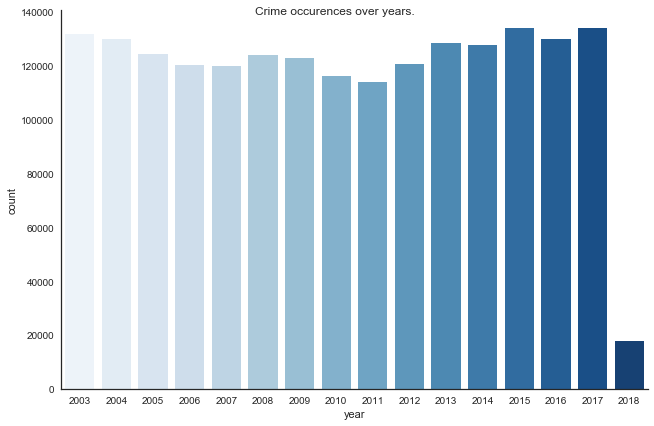

In [5]:
g = sns.factorplot(x="year", data=crime_data, kind="count",
                   palette="Blues", size=6, aspect=1.5, order=np.sort(crime_data['year'].unique()))
g.set_xticklabels(step=1)
g.fig.suptitle('Crime occurences over years.')

##### Crime occurences on each weekday.

Text(0.5,0.98,'Crime occurences on each weekday.')

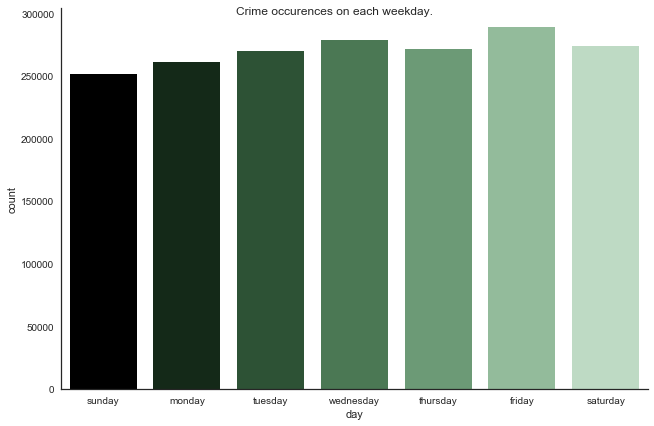

In [6]:
g = sns.factorplot(x="day", data=crime_data, kind="count",
                   palette=sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True), size=6, aspect=1.5, order=['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday'])
g.set_xticklabels(step=1)
g.fig.suptitle('Crime occurences on each weekday.')

##### Crime occurences over months.

Text(0.5,0.98,'Crime occurences over months.')

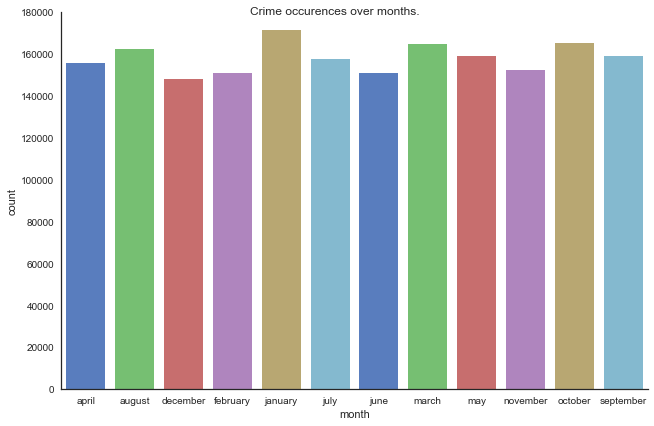

In [7]:
g = sns.factorplot(x="month", data=crime_data, kind="count",
                   palette="muted", size=6, aspect=1.5, order=np.sort(crime_data['month'].unique()))
g.set_xticklabels(step=1)
g.fig.suptitle('Crime occurences over months.')

##### Crime occurences over time intervals.

In [8]:
time_interval_num = crime_data['time_interval'].apply(discretizeTime)
crime_data['time_interval_num'] = time_interval_num

Text(0.5,0.98,'Crime occurences over time intervals.')

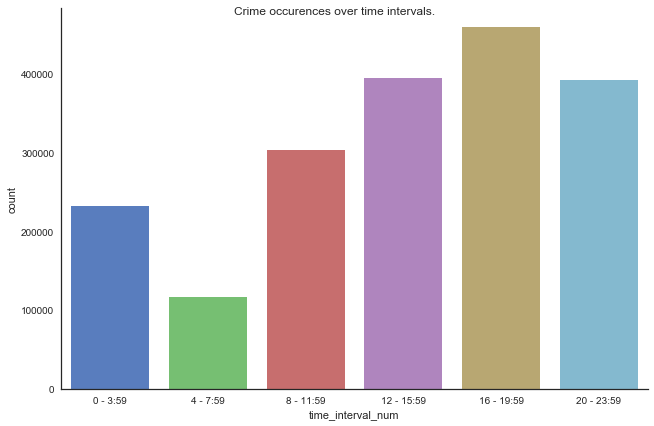

In [9]:
g = sns.factorplot(x="time_interval_num", data=crime_data, kind="count",
                   palette="muted", size=6, aspect=1.5, order=['0 - 3:59', '4 - 7:59', '8 - 11:59', '12 - 15:59', '16 - 19:59', '20 - 23:59'])
g.set_xticklabels(step=1)
g.fig.suptitle('Crime occurences over time intervals.')

##### Crime division among the districts.

In [10]:
district = crime_data['district'].value_counts()

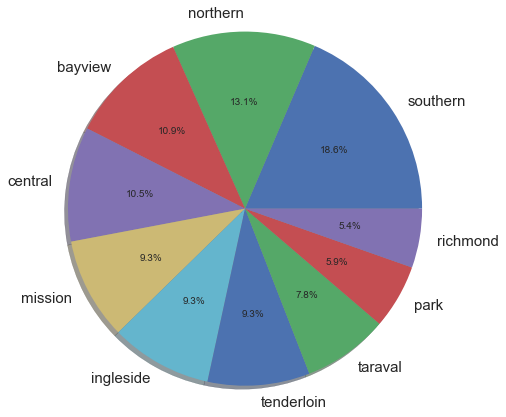

In [11]:
# pie chart of district wise crime percentages
labels = ['southern', 'northern', 'bayview', 'central', 'mission', 'ingleside', 'tenderloin', 'taraval', 'park', 'richmond']
sizes = [district['southern'], district['northern'], district['bayview'], district['central'], district['ingleside'], district['tenderloin'], district['ingleside'], district['taraval'], district['park'],  district['richmond'] ]


# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots(figsize = (7,7))
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
for i in range(0, len(district)):
    texts[i].set_fontsize(15)
ax1.axis('equal')
plt.show()


##### Crime occurences for different categories over years.

In [12]:
category = crime_data['category'].unique()
category_count = crime_data['category'].value_counts()

labels=[]
sizes = []

for i in category:
    labels.append(i)
    sizes.append(category_count[i])


In [13]:
# pie chart of district wise crime percentages

# print labels
# print sizes
# #print(sizes) # adds up to 1433, which is the total number of participants
# fig1, ax1 = plt.subplots(figsize = (20,20))
# patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
# for i in range(0, len(category_count)):
#     texts[i].set_fontsize(15)
# ax1.axis('equal')
# plt.show()


Text(0.5,0.98,'Crime occurences for different categories over years.')

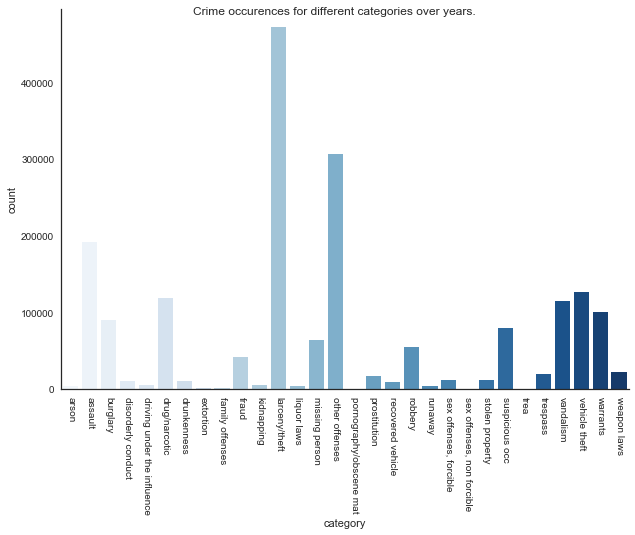

In [14]:
g = sns.factorplot(x="category", data=crime_data, kind="count",
                   palette="Blues", size=6, aspect=1.5, order=np.sort(crime_data['category'].unique()))
g.set_xticklabels(rotation = -90)
g.fig.suptitle('Crime occurences for different categories over years.')

##### Crime occurences around different neighborhoods across time intervals.

In [ ]:
g = sns.regplot(x="time_interval", y="category", data=crime_data, ci = False,
    scatter_kws={"color":"darkred","alpha":0.3,"s":90},
    line_kws={"color":"g","alpha":0.5,"lw":4},marker="x")

In [ ]:
filtero= crime_data.query("near_colleges==1 & label=='high'").groupby('time_interval').agg('count')
y_colleges = filtero["near_colleges"]

In [ ]:
filtero= crime_data.query("near_facilities==1 & label=='high'").groupby('time_interval').agg('count')
y_facilities = filtero["near_facilities"]

In [ ]:
filtero= crime_data.query("near_private_spaces==1 & label=='high'").groupby('time_interval').agg('count')
y_private_spaces = filtero["near_private_spaces"]


In [ ]:
filtero= crime_data.query("near_public_open_spaces == 1 & label=='high'").groupby('time_interval').agg('count')
y_public_open_spaces = filtero["near_public_open_spaces"]


In [ ]:
filtero= crime_data.query("near_commuter_stops == 1 & label=='high'").groupby('time_interval').agg('count')
y_commuter_stops = filtero["near_commuter_stops"]

In [ ]:
filtero= crime_data.query("near_public_park == 1 & label=='high'").groupby('time_interval').agg('count')
y_public_park = filtero["near_public_park"]

In [ ]:
filtero= crime_data.query("near_landmarks == 1 & label=='high'").groupby('time_interval').agg('count')
y_landmarks = filtero["near_landmarks"]

In [ ]:
filtero= crime_data.query("near_schools == 1 & label=='high'").groupby('time_interval').agg('count')
y_schools = filtero["near_schools"]

In [ ]:
plt.style.use('seaborn-darkgrid')
#print(plt.style.available)
x=[1,2,3,4,5,6]
plt.suptitle('Crime occurences around different neighborhoods across time intervals.', fontsize=14)
plt.xlabel("time interval", fontsize=12)
plt.ylabel("Crime occurences")
plt.plot(x,y_colleges,'-o')
plt.plot(x,y_facilities, '-o')
plt.plot(x,y_private_spaces, '-o')
plt.plot(x,y_public_open_spaces, '-o')
plt.plot(x,y_commuter_stops, '-o')
plt.plot(x,y_public_park, '-o')
plt.plot(x,y_landmarks, '-o')
plt.plot(x,y_schools, '-o')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.legend(['colleges', 'facilities', 'private spaces', 'public open spaces', 'commuter stops', 'public park', 'landmarks', 'schools'], loc='upper left')

